## Importing Livraries and CSV file

In [1]:
# Importing libraries

import pandas as pd
import csv
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing CSV files as DataFrames

path = "C:/Users/assus/Desktop/PCD/Data Set"
df = pd.read_csv(path+"/model.csv")
dfAI = pd.read_csv(path+"/AIData.csv")

In [3]:
df.head()

,Scholarship Name,University,Scholarship Value,Deadline,Location,Bachelor,Phd,Master,Text,information systems management,...,innovation,operations management,health informatic,quantitative method,arts statistic,informatic,healthcare management healthcare informatic,statistic,predictive analytic,Rank
0,2020 Mixed Martial Arts Scholarship by MiddleE...,NaN,900.0,2020-11-15,NaN,1.0,0.0,0.0,mixed martial art scholarship middleeasycomthe...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020 Fitness and Educational Scholarship,NaN,1000.0,2020-11-15,NaN,1.0,0.0,0.0,fitness educational scholarshipthe selected st...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Katoni scholarship - Supporting cultural p...,NaN,NaN,2020-05-01,Denmark,1.0,1.0,1.0,the katoni scholarship supporting cultural pro...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Writing Contest Scholarship 2020,NaN,NaN,2020-05-31,NaN,1.0,1.0,1.0,writing contest scholarship our three winner g...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Greg Baumgartner Scholarship,NaN,1000.0,2020-08-31,NaN,1.0,0.0,0.0,greg baumgartner scholarshipone winner receive...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1) Model Based on Descriptions

In [4]:
# Creating Dataframe with Text Column only

df_t = pd.DataFrame(data=None,columns=['Description'])
df_t['Description']=df['Text']
df_t.head()

,Description
0,mixed martial art scholarship middleeasycomthe...
1,fitness educational scholarshipthe selected st...
2,the katoni scholarship supporting cultural pro...
3,writing contest scholarship our three winner g...
4,greg baumgartner scholarshipone winner receive...


### Text Pre-Processing

In [5]:
# Convertion of Text to Numeric with TF-IDF Vectoriser

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf.fit(df_t["Description"])
dtm = tfidf.transform(df_t["Description"])

### Training with NMF Algorithm

In [6]:
# Training the model

from sklearn.decomposition import NMF

true_k = 10
random = 0
nmf_model = NMF(n_components=true_k,random_state=random)
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [7]:
# Displaying the Top 15 words for each topic

'''for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')'''

"for index,topic in enumerate(nmf_model.components_):\n    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')\n    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])\n    print('\n')"

In [8]:
# Adding NMF Clomun for the prediction with NMF Algorithm

topic_results = nmf_model.transform(dtm)
topic_results.argmax(axis=1)
df_t['NMF'] = topic_results.argmax(axis=1)

### Training with KMeans Algorithm

In [9]:
from sklearn.cluster import KMeans

kmean_t_model = KMeans(n_clusters=true_k)
kmean_t_model.fit(dtm)

# displaying Top 15 terms per cluster
'''print("Top terms per cluster:")
order_centroids = kmean_t_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),'''

'print("Top terms per cluster:")\norder_centroids = kmean_t_model.cluster_centers_.argsort()[:, ::-1]\nterms = tfidf.get_feature_names()\nfor i in range(true_k):\n    print("Cluster %d:" % i),\n    for ind in order_centroids[i, :15]:\n        print(\' %s\' % terms[ind]),'

In [10]:
# Adding KMeans Clomun for the prediction with Kmeans Algorithm

df_t["KMeans"]=[i for i in range(len(df_t))]
for i in range(len(df_t)):
    Y = tfidf.transform([df_t["Description"][i]])
    prediction = kmean_t_model.predict(Y)
    df_t["KMeans"][i]=prediction

In [11]:
# Predicting one example

Y = tfidf.transform(["2020 Mixed Martial Arts Scholarship by MiddleEasy.comThe winner will receive 900$ in scholarship prize.$900Any high school senior or college/university student is eligible to participate.Must be a U.S. CitizenHere at MiddleEasy.com we value the importance of education with a healthy and active lifestyle which is why we’d like to offer an eligible student the opportunity to win a\xa0$900\xa0scholarship in an effort to assist with the costs of continued education.Each applicant must submit a video of them speaking or an essay and both must be original.Video submissions must not exceed 5 minutes in length (There will be a lot of submissions and time is limited).Essays must be at least 800-1500 words in length.Students must be able to provide proof of enrollment in their educational institution.The deadline of\xa0November 15 2020 must be adhered to and there are no exceptions.Bachelor Course"])
prediction = kmean_t_model.predict(Y)
print(prediction)

[8]


### Training with MiniBatchKMeans Algorithm

In [12]:
from sklearn.cluster import MiniBatchKMeans

MBKMeans_model = MiniBatchKMeans(n_clusters=true_k, random_state=random)
MBKMeans_model.fit(dtm)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [13]:
# Adding MiniBatchKMeans Clomun for the prediction with MiniBatchKMeans Algorithm

df_t["MiniBatchKMeans"]=[i for i in range(len(df_t))]
for i in range(len(df_t)):
    Y = tfidf.transform([df_t["Description"][i]])
    prediction = MBKMeans_model.predict(Y)
    df_t["MiniBatchKMeans"][i]=prediction

In [14]:
df_t.head()

,Description,NMF,KMeans,MiniBatchKMeans
0,mixed martial art scholarship middleeasycomthe...,9,8,3
1,fitness educational scholarshipthe selected st...,5,3,3
2,the katoni scholarship supporting cultural pro...,4,3,1
3,writing contest scholarship our three winner g...,0,5,3
4,greg baumgartner scholarshipone winner receive...,5,3,3


### Data Visualisation

In [15]:
# Importing libraries

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
# Reducing dimension of features to 2D using PCA

pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(dtm.toarray())
reduced_cluster_centers = pca.transform(kmean_t_model.cluster_centers_)

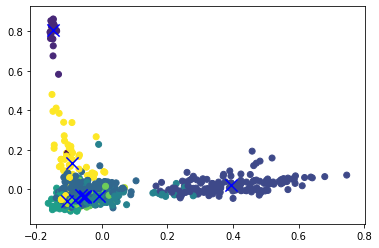

In [17]:
# Creating 2D figure

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmean_t_model.predict(dtm))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [18]:
# Reducing dimension of features to 3D using PCA

pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(dtm.toarray())
reduced_cluster_centers = pca.transform(kmean_t_model.cluster_centers_)

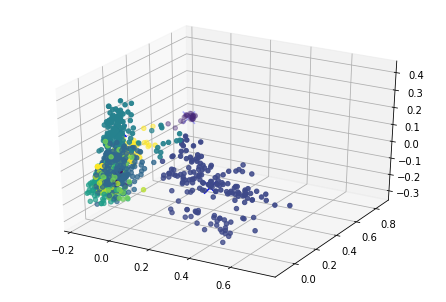

In [19]:
# Creating 3D figure

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2], c=kmean_t_model.predict(dtm))
ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], reduced_cluster_centers[:,2], marker='x', s=150, c='b')
plt.show()

### Model Evaluation

In [20]:
# Calculating score with silhouette method

from sklearn.metrics import silhouette_score
print("silhouette Score of KMeans: ", silhouette_score(dtm, labels=kmean_t_model.predict(dtm)))
print("silhouette Score of MiniBatchKMeans: ", silhouette_score(dtm, labels=MBKMeans_model.predict(dtm)))

silhouette Score of KMeans:  0.027535356774142303
silhouette Score of MiniBatchKMeans:  0.02544974792685185


## 2) Model Based on all Data 

In [21]:
# Creating new DataFrame

df1 = pd.DataFrame(data=None,columns=['Description'])
df1["Scholarship Name"]=df["Scholarship Name"]
df1["Scholarship Value"]=df["Scholarship Value"]
df1["Bachelor"]=df["Bachelor"]
df1["Phd"]=df["Phd"]
df1["Master"]=df["Master"]
df1['Description']=df['Text']

In [22]:
df1.head()

,Description,Scholarship Name,Scholarship Value,Bachelor,Phd,Master
0,mixed martial art scholarship middleeasycomthe...,2020 Mixed Martial Arts Scholarship by MiddleE...,900.0,1.0,0.0,0.0
1,fitness educational scholarshipthe selected st...,2020 Fitness and Educational Scholarship,1000.0,1.0,0.0,0.0
2,the katoni scholarship supporting cultural pro...,The Katoni scholarship - Supporting cultural p...,NaN,1.0,1.0,1.0
3,writing contest scholarship our three winner g...,Writing Contest Scholarship 2020,NaN,1.0,1.0,1.0
4,greg baumgartner scholarshipone winner receive...,Greg Baumgartner Scholarship,1000.0,1.0,0.0,0.0


### Normalisation

In [23]:
# Removing all Rows with None value

df2=df1.dropna()
print(len(df1))
print(len(df2))

1189
618


In [24]:
# Normalisation of Money Column

Mny=df2['Scholarship Value']
maximum=max(Mny)
Mny1=list(df2['Scholarship Value'])
print(len(df2['Scholarship Value']))
print(maximum)

for i,j in enumerate(Mny1):
    Mny1[i]=j/maximum
df2['Scholarship Value']=Mny1

618
100000.0


### Training with KMeans Algorithm

In [25]:
# Merging numeric data with text data vectorised

a=dtm.toarray().tolist() # array of vectorised text data
X=np.array(df2.drop(['Description','Scholarship Name'],axis=1)) # array of numeric data

data=[]
for i in range(len(df2)):
    data.append(list(X[i])+a[i])
    
X=np.array(data) # array of numeric + vectorised text data

In [26]:
from sklearn.cluster import KMeans

nbre_clusters=20

KMeans_model = KMeans(n_clusters=nbre_clusters)
KMeans_model.fit(X)
predictions = KMeans_model.predict(X)

# Adding KMeans Clomun for the prediction with Kmeans Algorithm
df2["KMeans"]=predictions

In [27]:
# Testing the model with an example

t=tfidf.transform(["Here at MiddleEasy.com we value the importance."])
t=t.toarray().tolist()

KMeans_model.predict([list((0.00900,1,0,0))+t[0]])

array([2])

### Data Visualisation

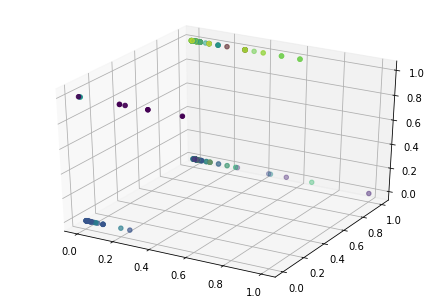

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=predictions)
plt.show()

In [29]:
df2.head()

,Description,Scholarship Name,Scholarship Value,Bachelor,Phd,Master,KMeans
0,mixed martial art scholarship middleeasycomthe...,2020 Mixed Martial Arts Scholarship by MiddleE...,0.009,1.0,0.0,0.0,2
1,fitness educational scholarshipthe selected st...,2020 Fitness and Educational Scholarship,0.010,1.0,0.0,0.0,2
4,greg baumgartner scholarshipone winner receive...,Greg Baumgartner Scholarship,0.010,1.0,0.0,0.0,4
6,breast cancer car donation annual college scho...,Breast Cancer Car Donations Annual College Sch...,0.010,1.0,1.0,1.0,17
7,jezic moyse scholarshipwe award one exceptiona...,Jezic & Moyse Scholarship,0.020,1.0,0.0,0.0,16


### Choosing the optimal number of clusters

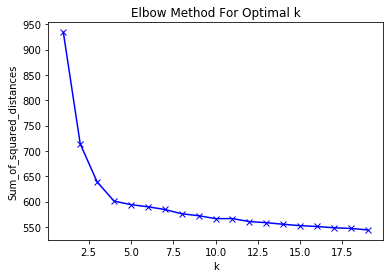

In [30]:
# Eblow Method

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.21161996017007156
For n_clusters = 3 The average silhouette_score is : 0.17700037901032395
For n_clusters = 4 The average silhouette_score is : 0.18175529676832494
For n_clusters = 5 The average silhouette_score is : 0.09875905697186371
For n_clusters = 6 The average silhouette_score is : 0.047775042104438496
For n_clusters = 10 The average silhouette_score is : 0.05542182586396399
For n_clusters = 15 The average silhouette_score is : 0.031542018549430395
For n_clusters = 20 The average silhouette_score is : 0.024498804186467205


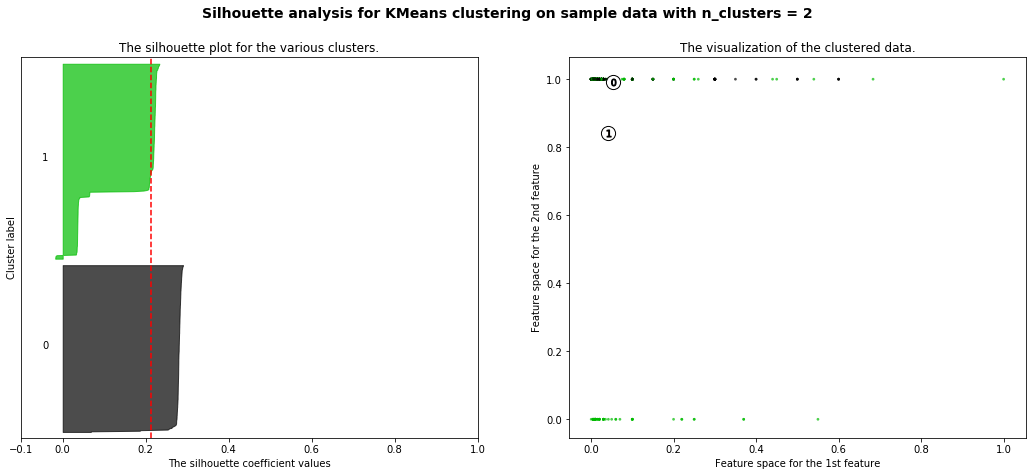

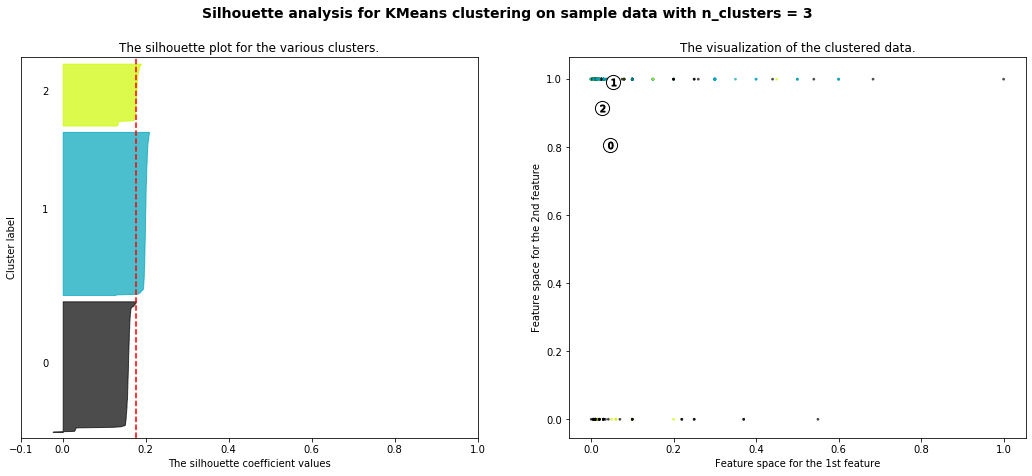

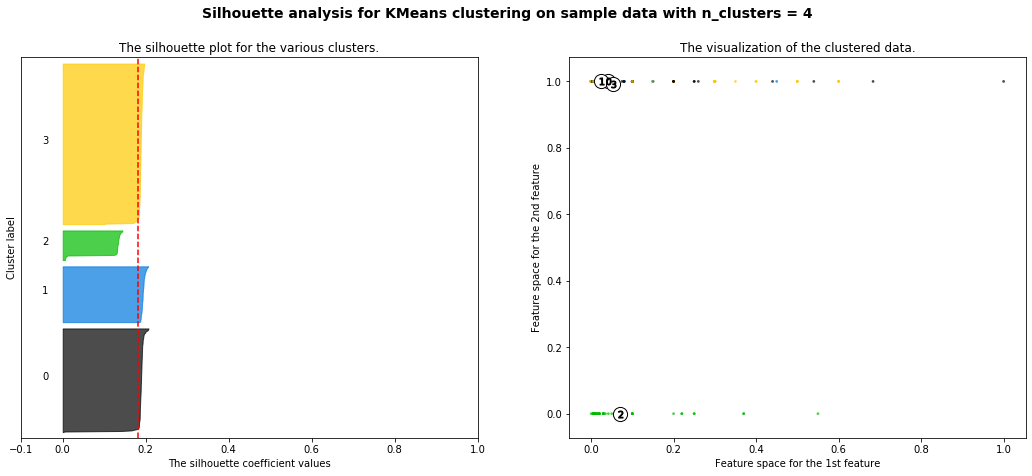

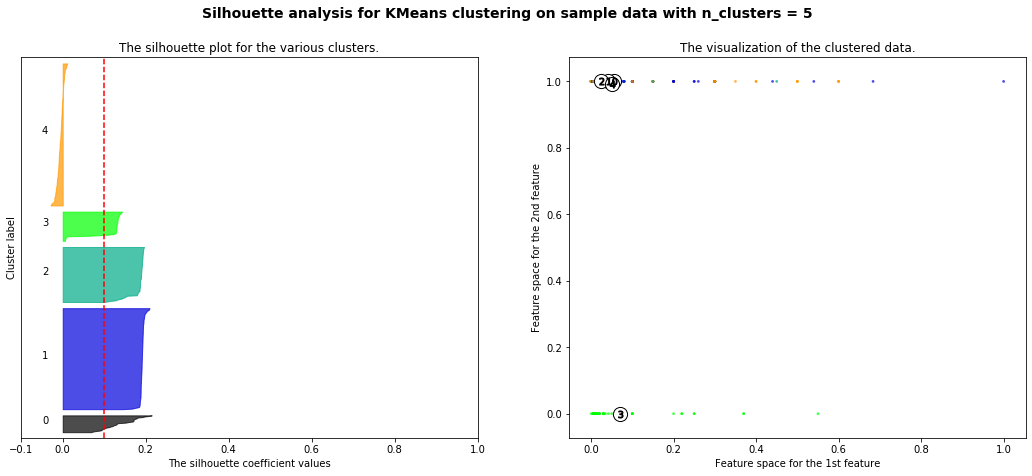

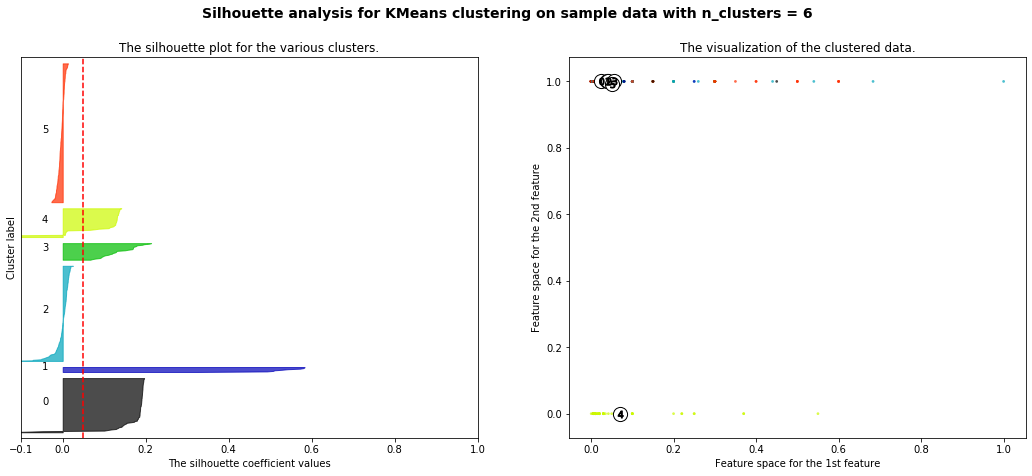

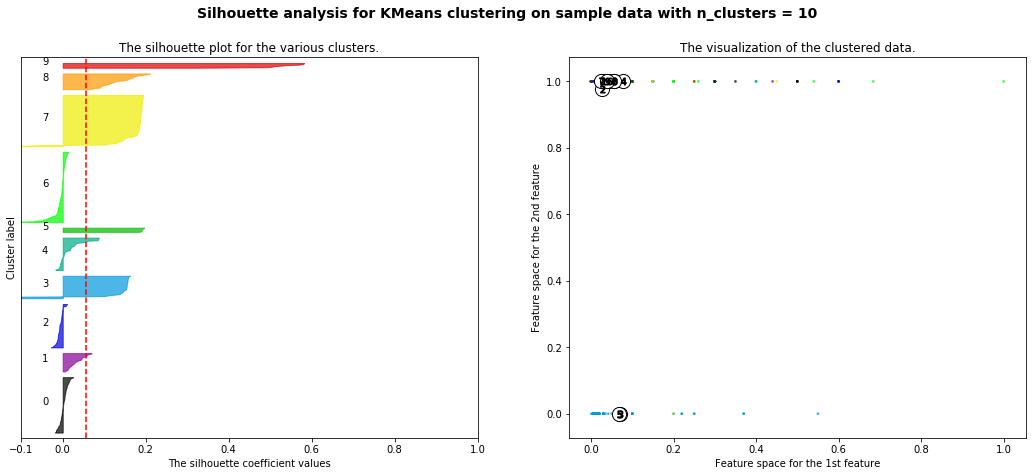

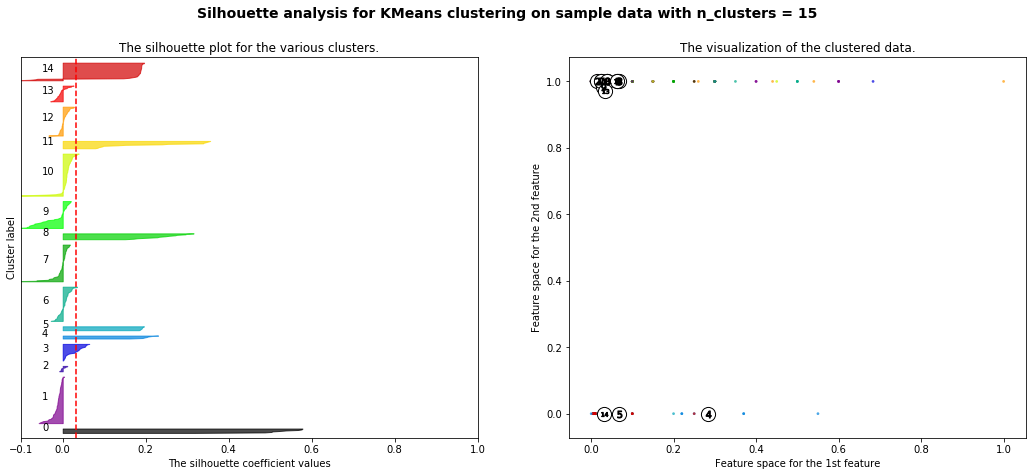

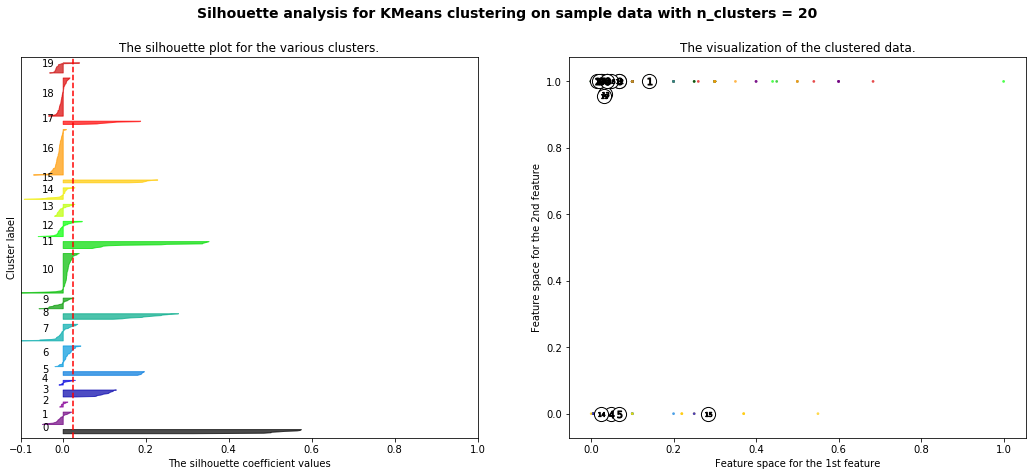

In [31]:
# By silhouette method

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6,10,15,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Model Evaluation

In [32]:
# Evaluation by metrics calculation

from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, SpectralClustering


k=20
algorithms = []
algorithms.append(KMeans(n_clusters=k, random_state=1))
algorithms.append(SpectralClustering(n_clusters=k, random_state=1,affinity='nearest_neighbors'))
algorithms.append(DBSCAN(eps=0.1, min_samples=2))
algorithms.append(AffinityPropagation())
algorithms.append(AgglomerativeClustering(n_clusters=k))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({'Silhouette': metrics.silhouette_score(X, algo.labels_)}))
    
results = pd.DataFrame(data=data, columns=['Silhouette'],
                       index=['K-means','Spectral', 'DBSCAN', 'Affinity', 
                              'Agglomerative'])

results

,Silhouette
K-means,0.036212
Spectral,0.034653
DBSCAN,-0.032578
Affinity,0.044342
Agglomerative,0.032420


### Adding Class Column to CSV File

In [33]:
dfAI['class']=[None for i in range(len(dfAI))]

for i,x in enumerate(dfAI['Scholarship Name']):
    if x in df2['Scholarship Name'].tolist():
        dfAI['class'][i]=df2[df2['Scholarship Name']==x]['KMeans'].tolist()[0]

In [34]:
# saving as CSV and Excel File

dfAI.to_csv(path+"/Final_Data.csv",encoding='utf-8',index=False)
dfAI.to_excel(path+"/Final_Data.xlsx",encoding='utf-8')

## Saving Model

In [35]:
# Saving Model Using Pickle library
import pickle

# save the kmean model to disk
file1 = 'kmean.sav'
pickle.dump(KMeans_model, open(file1, 'wb'))

# save the TF-IDF vectorizer to disk
file2 = 'tf-idf.sav'
pickle.dump(tfidf, open(file2, 'wb'))

In [36]:
#load the model from disk

loaded_model = pickle.load(open(file1, 'rb'))
loaded_vectorizer = pickle.load(open(file2, 'rb'))

In [37]:
# Predict with loaded model

t=loaded_vectorizer.transform(["Here at MiddleEasy.com we value the importance."])
t=t.toarray().tolist()
loaded_model.predict([list((0.00900,1,0,0))+t[0]])

array([2])